In [2]:
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

energies = energyList('*.out')
lattice_energy = latticeEnergy('li3ocl_li_vac.out')

licl = latticeEnergy('alicl.out') #lattice parameter from ucl.ac.uk
li2o = latticeEnergy('ali2o.out') #lattice parameter from ucl.ac.uk
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de
mgcl2 = latticeEnergy('amgcl2.out') #materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)

magic = open('output_Li3OCl.txt', 'w+')

magic.write("Calculations on Li3OCl anti-perovskite:")
magic.write("\n")
magic.write("***************************************")
magic.write("\n")
magic.write("\n")
magic.write("Li vacancy defect energy: " + str(round(energies['li3ocl_li_vac.out'], 2)) + " eV" + "\n")
magic.write("Li vacancy migration barrier: " + str(round((energies['li3ocl_li_vmig.out'] - energies['li3ocl_li_vac.out']), 2)) + " eV" + "\n")
magic.write("Li interstitial defect energy: " + str(round(energies['li3ocl_li_int.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("O vacancy defect energy: " + str(round(energies['li3ocl_o_vac.out'], 2)) + " eV" + "\n")
magic.write("O vacancy migration barrier: " + str(round((energies['li3ocl_o_vmig.out'] - energies['li3ocl_o_vac.out']), 2)) + " eV" + "\n")
magic.write("O interstitial defect energy: " + str(round(energies['li3ocl_o_int.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Cl vacancy defect energy: " + str(round(energies['li3ocl_cl_vac.out'], 2)) + " eV" + "\n")
magic.write("Cl vacancy migration barrier: " + str(round((energies['li3ocl_cl_vmig.out'] - energies['li3ocl_cl_vac.out']), 2)) + " eV" + "\n")
magic.write("Cl interstitial defect energy: " + str(round(energies['li3ocl_cl_int.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Mg impurity on Li defect energy: " + str(round(energies['li3ocl_mg_dop.out'], 2)) + " eV" + "\n")
magic.write("Ca impurity on Li defect energy: " + str(round(energies['li3ocl_ca_dop.out'], 2)) + " eV" + "\n")
magic.write("Sr impurity on Li defect energy: " + str(round(energies['li3ocl_sr_dop.out'], 2)) + " eV" + "\n")
magic.write("Ba impurity on Li defect energy: " + str(round(energies['li3ocl_ba_dop.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Mg impurity and Li vacancy energy: " + str(round(energies['li3ocl_mg_clu.out'], 2)) + " eV" + "\n")
magic.write("Ca impurity and Li vacancy energy: " + str(round(energies['li3ocl_ca_clu.out'], 2)) + " eV" + "\n")
magic.write("Sr impurity and Li vacancy energy: " + str(round(energies['li3ocl_sr_clu.out'], 2)) + " eV" + "\n")
magic.write("Ba impurity and Li vacancy energy: " + str(round(energies['li3ocl_ba_clu.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Li3OCl Schottky defect energy: " + str(round((energies['li3ocl_li_vac.out'] * 3 + energies['li3ocl_o_vac.out'] + energies['li3ocl_cl_vac.out'] + lattice_energy), 2)) + " eV" + "\n")
magic.write("LiCl partial Schottky defect energy: " + str(round((energies['li3ocl_li_vac.out'] + energies['li3ocl_cl_vac.out'] - 8.72), 2)) + " eV" + "\n")
magic.write("Li2O partial Schottky defect energy: " + str(round((energies['li3ocl_li_vac.out'] * 2 + energies['li3ocl_o_vac.out'] - 30.06), 2)) + " eV" + "\n")
magic.write("Li Frenkel defect energy: " + str(round((energies['li3ocl_li_vac.out'] + energies['li3ocl_li_int.out']), 2)) + " eV" + "\n")
magic.write("O Frenkel defect energy: " + str(round((energies['li3ocl_o_vac.out'] + energies['li3ocl_o_int.out']), 2)) + " eV" + "\n")
magic.write("Cl Frenkel defect energy: " + str(round((energies['li3ocl_cl_vac.out'] + energies['li3ocl_cl_int.out']), 2)) + " eV" + "\n")
magic.write("\n")
magic.write("MgCl2 on Li doping defect energy: " + str(round((energies['li3ocl_li_vac.out'] + energies['li3ocl_mg_dop.out'] + licl * 2 - mgcl2), 2)) + " eV" + "\n")
magic.write("MgO on Li doping defect energy: " + str(round((energies['li3ocl_li_vac.out'] + energies['li3ocl_mg_dop.out'] + li2o - mgo), 2)) + " eV" + "\n")
magic.write("Mg impurity and Li vacancy clustering energy: " + str(round((energies['li3ocl_mg_clu.out'] - energies['li3ocl_mg_dop.out'] - energies['li3ocl_li_vac.out']), 2)) + " eV" + "\n")
magic.write("CaCl2 on Li doping defect energy: " + str(round((energies['li3ocl_li_vac.out'] + energies['li3ocl_ca_dop.out'] + licl * 2 - cacl2), 2)) + " eV" + "\n")
magic.write("CaO on Li doping defect energy: " + str(round((energies['li3ocl_li_vac.out'] + energies['li3ocl_ca_dop.out'] + li2o - cao), 2)) + " eV" + "\n")
magic.write("Ca impurity and Li vacancy clustering energy: " + str(round((energies['li3ocl_ca_clu.out'] - energies['li3ocl_ca_dop.out'] - energies['li3ocl_li_vac.out']), 2)) + " eV" + "\n")
magic.write("SrCl2 on Li doping defect energy: " + str(round((energies['li3ocl_li_vac.out'] + energies['li3ocl_sr_dop.out'] + licl * 2 - srcl2), 2)) + " eV" + "\n")
magic.write("SrO on Li doping defect energy: " + str(round((energies['li3ocl_li_vac.out'] + energies['li3ocl_sr_dop.out'] + li2o - sro), 2)) + " eV" + "\n")
magic.write("Sr impurity and Li vacancy clustering energy: " + str(round((energies['li3ocl_sr_clu.out'] - energies['li3ocl_sr_dop.out'] - energies['li3ocl_li_vac.out']), 2)) + " eV" + "\n")
magic.write("BaCl2 on Li doping defect energy: " + str(round((energies['li3ocl_li_vac.out'] + energies['li3ocl_ba_dop.out'] + licl * 2 - bacl2), 2)) + " eV" + "\n")
magic.write("BaO on Li doping defect energy: " + str(round((energies['li3ocl_li_vac.out'] + energies['li3ocl_ba_dop.out'] + li2o - bao), 2)) + " eV" + "\n")
magic.write("Ba impurity and Li vacancy clustering energy: " + str(round((energies['li3ocl_ba_clu.out'] - energies['li3ocl_ba_dop.out'] - energies['li3ocl_li_vac.out']), 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Lattice energy of Li3OCl (from calculations): " + str(round(lattice_energy, 2)) + " eV" + "\n")
magic.write("Lattice energy of LiCl (from calculations): " + str(round(licl, 2)) + " eV" + "\n")
magic.write("Lattice energy of Li2O (from calculations): " + str(round(li2o, 2)) + " eV" + "\n")
magic.write("Lattice energy of MgO (from calculations): " + str(round(mgo, 2)) + " eV" + "\n")
magic.write("Lattice energy of MgCl2 (from calculations): " + str(round(mgcl2, 2)) + " eV" + "\n")
magic.write("Lattice energy of CaO (from calculations): " + str(round(cao, 2)) + " eV" + "\n")
magic.write("Lattice energy of CaCl2 (from calculations): " + str(round(cacl2, 2)) + " eV" + "\n")
magic.write("Lattice energy of SrO (from calculations): " + str(round(sro, 2)) + " eV" + "\n")
magic.write("Lattice energy of SrCl2 (from calculations): " + str(round(srcl2, 2)) + " eV" + "\n")
magic.write("Lattice energy of BaO (from calculations): " + str(round(bao, 2)) + " eV" + "\n")
magic.write("Lattice energy of BaCl2 (from calculations): " + str(round(bacl2, 2)) + " eV" + "\n")

magic.close()

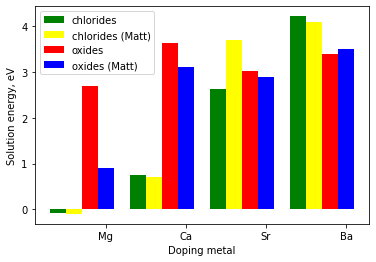

In [7]:
import numpy as np
import matplotlib.pyplot as plt
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

metals = ['mg', 'ca', 'sr', 'ba']

labels = ['Mg', 'Ca', 'Sr', 'Ba']
cl_solution_energies = []
o_solution_energies = []
matt = [0.9, 3.1, 2.9, 3.5]
mattcl = [-0.1, 0.7, 3.7, 4.1]

for i in metals:
    mcl2 = latticeEnergy('a' + i + 'cl2.out')
    if i == 'ca':
        mcl2 = mcl2 / 2
    cl_solution_energies.append(energies['li3ocl_li_vac.out'] + energies['li3ocl_' + i + '_dop.out'] + licl * 2 - mcl2)
    
for i in metals:
    mo = latticeEnergy('a' + i + 'o.out')
    o_solution_energies.append(energies['li3ocl_li_vac.out'] + energies['li3ocl_' + i + '_dop.out'] + li2o - mo)

plt.bar(np.arange(len(metals)), cl_solution_energies, color='green', tick_label=labels, width=0.2)
plt.bar(np.arange(len(metals))+0.2, mattcl, color='yellow', tick_label=labels, width=0.2)
plt.bar(np.arange(len(metals))+0.4, o_solution_energies, color='red', tick_label=labels, width=0.2)
plt.bar(np.arange(len(metals))+0.6, matt, color='blue', tick_label=labels, width=0.2)
plt.xlabel('Doping metal')
plt.ylabel('Solution energy, eV')
plt.legend(labels=['chlorides', 'chlorides (Matt)', 'oxides', 'oxides (Matt)'])
plt.savefig('/home/ben/Documents/gulp/summary/li3ocl_doping.jpg', bbox_inches='tight', dpi=500,)

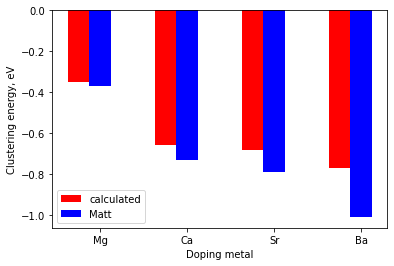

In [9]:
import numpy as np
import matplotlib.pyplot as plt
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

metals = ['mg', 'ca', 'sr', 'ba']

labels = ['Mg', 'Ca', 'Sr', 'Ba']
clustering_energies = []
matt = [-0.37, -0.73, -0.79, -1.01]

for i in metals:
    clustering_energies.append(energies[f'li3ocl_{i}_clu.out'] - energies[f'li3ocl_{i}_dop.out'] - energies['li3ocl_li_vac.out'])

plt.bar(np.arange(len(metals)), clustering_energies, color='red', tick_label=labels, width=0.25)
plt.bar(np.arange(len(metals))+0.25, matt, color='blue', tick_label=labels, width=0.25)
plt.xlabel('Doping metal')
plt.ylabel('Clustering energy, eV')
plt.legend(labels=['calculated', 'Matt'])
plt.savefig('/home/ben/Documents/gulp/summary/li3ocl_clustering.jpg', bbox_inches='tight', dpi=500)

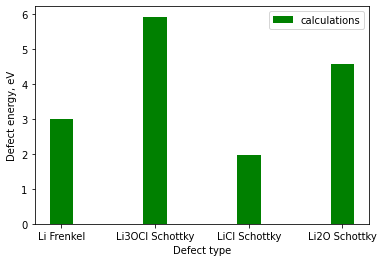

In [13]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Li Frenkel', 'Li3OCl Schottky', 'LiCl Schottky', 'Li2O Schottky']

calculations = [(energies['li3ocl_li_vac.out'] + energies['li3ocl_li_int.out']), 
                (energies['li3ocl_li_vac.out'] * 3 + energies['li3ocl_o_vac.out'] + energies['li3ocl_cl_vac.out'] + lattice_energy), 
                (energies['li3ocl_li_vac.out'] + energies['li3ocl_cl_vac.out'] + licl), 
                (energies['li3ocl_li_vac.out'] * 2 + energies['li3ocl_o_vac.out'] + li2o)]

plt.bar(np.arange(len(calculations)), calculations, color='green', tick_label=labels, width=0.25)
plt.xlabel('Defect type')
plt.ylabel('Defect energy, eV')
plt.legend(labels=['calculations', 'Dawson2018', 'Wan2015'])
plt.savefig('/home/ben/Documents/gulp/summary/li3ocl_defects.jpg', bbox_inches='tight', dpi=500)